# T1

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

np.random.seed(2023) # 设置种子数确保数据可重复性
ar1 = np.random.randn(100,5) # 制造一个100行5列的随机二维数组
df1 = pd.DataFrame(ar1, columns=['y','x1','x2','x3','x4']) # note:D&F are uppercase
ar2 = np.random.randn(100,1) # create a 100*1 array
df1.insert(2,"new",ar2) # use 'insert' to put an array to it

print(df1) # just print 'df1' ,no more words

me = df1.mean() # statistics have their own attributes
va = df1.var()
ske = df1.skew()
kur = df1.kurt()

print('\nthe mean of each column is\n%s' % me)
print('\nthe variance of each column is\n%s' % va)
print('\nthe skewness of each column is\n%s' % ske)
print('\nthe kurtosis of each column is\n%s' % kur)

cor = df1.corr()
cov = df1.cov()
print('\nthe correlation coefficient of any two columns is\n%s' % cor)
print('\nthe covariance of any two columns is\n%s' % cov)

X = df1[['x1','new','x2','x3','x4']] # create a matrix of independent var.s
Y = df1[['y']] 
X = sm.add_constant(X) # adding a constant
results = sm.OLS(Y,X).fit()# use data to run a regression,getting a fitted model
print(results.summary())

yture = df1['y'] 
yhat = results.fittedvalues # 利用attribute去得到估计值
error = yture-yhat # 还有一个解：results.resid

print('\nthe fitted value of y are\n%s' % yhat)
print('\nthe errors are\n%s' % error)

           y        x1       new        x2        x3        x4
0   0.711674 -0.324485 -1.035702 -1.001871  0.236251 -0.102160
1  -1.141293  2.654407  0.043306  1.440605  0.098902 -3.121532
2  -1.076522 -0.325682  1.646860 -1.035498 -0.426320 -1.029361
3  -0.521774 -0.422758  0.064989 -0.099244 -1.380258  0.301903
4  -1.033599 -1.502178  0.046370 -1.379593 -0.204455  0.642125
..       ...       ...       ...       ...       ...       ...
95 -0.440927 -0.637859  0.506786  0.531135  0.599575 -0.713001
96  1.142146 -1.876116 -0.101793  2.114545 -0.100134  0.475642
97  0.806010  1.584579 -0.422682 -0.881275 -0.110238 -0.117327
98  0.920437  1.806427  2.041591  0.678946  0.344808  1.334276
99 -0.876346  0.194090 -1.017331  1.753552  0.517270 -0.279535

[100 rows x 6 columns]

the mean of each column is
y      0.103046
x1     0.115434
new   -0.060465
x2    -0.080884
x3    -0.073043
x4     0.050664
dtype: float64

the variance of each column is
y      1.103542
x1     1.134692
new    0.847199
x

# T2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import cauchy

# target function
f = lambda x: norm.pdf(x,scale=10**(1/2),loc=-20)*0.5+ norm.pdf(x,scale=5**(1/2),loc=-5)*0.2 + norm.pdf(x,scale=20**(1/2),loc=3)*0.3

# proposal function
r = 10
l = -10
g = lambda x: np.pi*r**(-1)*(1+((x-l)/r)**2)**(-1)

# 使用最大比率查找M
x = np.linspace(-80,80,5000)
M = max(f(x) / g(x))
print("Smallest M=", M)


Smallest M= 0.42208815022958784


# T3

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import cauchy

def rejection_sampling(l,r,iter):
    
    # 空列表去储存后续的接受样本点
    samples = [] 
    
    # 目标密度函数
    f = lambda x: norm.pdf(x,scale=10**(1/2),loc=-20)*0.5+ norm.pdf(x,scale=5**(1/2),loc=-5)*0.2 + norm.pdf(x,scale=20**(1/2),loc=3)*0.3
    # 建议密度函数
    g = lambda x: np.pi*r**(-1)*(1+((x-l)/r)**2)**(-1)
    
    # 使用最大比率查找M
    x = np.linspace(-40,30,5000)
    M = max(f(x) / g(x))
    
    for i in range(iter):
        x = cauchy.rvs(l,r) # 从柯西分布取值
        u = np.random.uniform(0, M*g(x)) # 从均匀分布取值
        # 接受条件
        if u <= f(x):
            samples.append(x)
            
    return np.array(samples)

fsamples = rejection_sampling(l=-10,r=10,iter=10000)

print(fsamples)

[-24.73846445 -19.92008374   7.60130363 ... -18.3384625  -23.99053049
 -19.27704337]


# T4

In [4]:
import numpy as np
from scipy.stats import norm
from scipy.stats import cauchy

# 目标密度函数
f = lambda x: norm.pdf(x,scale=10**(1/2),loc=-20)*0.5+ norm.pdf(x,scale=5**(1/2),loc=-5)*0.2 + norm.pdf(x,scale=20**(1/2),loc=3)*0.3
# 建议密度函数
g = lambda x: np.pi*r**(-1)*(1+((x-l)/r)**2)**(-1)

# 设置一个计算接受概率的函数
def accept(a=0):
    for i in range(1000):
        x = cauchy.rvs(l,r) # 从柯西分布取样
        u = np.random.uniform(0, M*g(x)) # 从均匀分布取值
        # 接受的条件
        if u<=f(x):
            a = a+1
    return a/1000

# 制造空列表去储存后续相应的值
accept_pros = []
r_list = []
l_list = []

# 根据图形确定遍历l，r的大致范围
for l in range(-25,10):
    for r in range(1,20):
        # 使用最大比率查找M
        x = np.linspace(-40,30,5000)
        M = max(f(x) / g(x))
        pro = accept(a=0)
        accept_pros.append(pro)
        r_list.append(r)
        l_list.append(l)

# 找到最大接受概率
max_value = max(accept_pros)
# 找到最大概率的对应的list的索引
index = accept_pros.index(max_value)
# 由于是一起跑的for循环，所以索引所对应的位置分别是最优化下的l和r
l_value = l_list[index]
r_value = r_list[index]

print(max_value)
print(l_value)
print(r_value)

0.335
-14
13


# T5

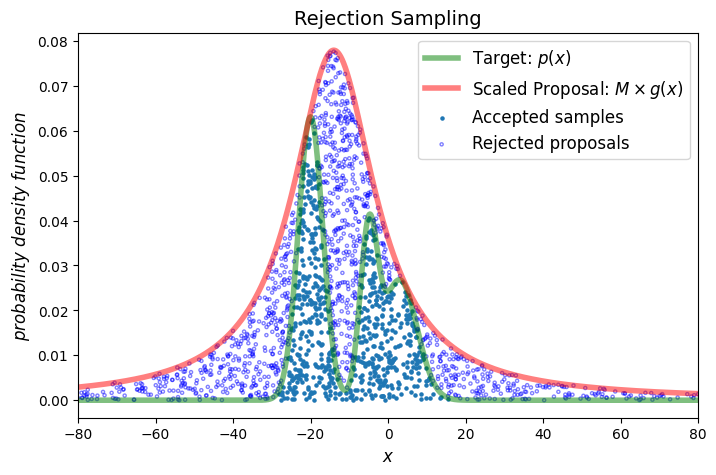

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import cauchy

# 第四题得到的最优proposal function的l，r
r = 13
l = -14


# 目标密度函数
f = lambda x: norm.pdf(x,scale=10**(1/2),loc=-20)*0.5+ norm.pdf(x,scale=5**(1/2),loc=-5)*0.2 + norm.pdf(x,scale=20**(1/2),loc=3)*0.3
# 建议密度函数
g = lambda x: np.pi*r**(-1)*(1+((x-l)/r)**2)**(-1)
    
# 使用最大比率查找M
x = np.linspace(-80,80,5000)
M = max(f(x) / g(x))



# 定义采样的函数
def rejection_sampling(l,r,iter=2000):
    
    # 空列表去储存后续的接受和拒绝样本点
    accepted_x = []
    accepted_y = []
    rejected_x = []
    rejected_y = []
    
    for i in range(iter):
        x = cauchy.rvs(l,r) # 从柯西分布取值
        y = np.random.uniform(0, M*g(x)) # 从均匀分布取值
        # 接受条件
        if y < f(x):
            accepted_x.append(x)
            accepted_y.append(y)
        else:
            rejected_x.append(x)
            rejected_y.append(y)    
    return accepted_x,accepted_y,rejected_x,rejected_y

accepted_x,accepted_y,rejected_x,rejected_y = rejection_sampling(-14,13)

# 绘制图形
plt.figure(figsize=(8,5))
plt.plot(x,f(x),alpha=0.5,lw=4, label=r"Target: $p(x)$",color='g')
plt.plot(x,M*g(x),alpha=0.5,lw=4, label=r"Scaled Proposal: $M\times g(x)$",color='r')
plt.scatter(accepted_x, accepted_y, label='Accepted samples',marker="o",s = 5)
plt.scatter(rejected_x, rejected_y, label='Rejected proposals', alpha=0.5,facecolors='none',edgecolors='b',s=5)
plt.xlim(-80,80) # 限制x轴的范围，把一些outliers去掉
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$probability \ density \ function$', fontsize=12)
plt.title(r'Rejection Sampling', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show()